<a href="https://colab.research.google.com/github/satwiksps/Deep-Learning/blob/main/02_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
#Pima-Indian-Diabetes Dataset
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv' #Load CSV using Pandas
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] #Define column names
data = read_csv(url, names=column_names) #Load CSV using Pandas
array = data.values #Convert to NumPy array
X = array[:,0:4] #Split into input column
y = array[:,4] #Split into output column
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Encode labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
Y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) #Split into train and test sets

In [18]:
scaler = StandardScaler ()
X_train = scaler . fit_transform ( X_train )
X_test = scaler . transform ( X_test )

In [19]:


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First layer: Dense layer with 16 neurons, ReLU activation, and input shape defined by the number of features in X_train
    Dense(32, activation='relu'),  # Second layer: Dense layer with 8 neurons and ReLU activation
    Dense(3, activation='softmax')  # Output layer: Dense layer with 3 neurons and softmax activation
])

# Line 3: Compiling the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer
    loss='categorical_crossentropy',  # Loss function: Categorical cross-entropy loss
    metrics=['accuracy']  # Metrics: Accuracy
)

# Line 4: Training the model
history = model.fit(
    X_train,  # Training data features
    Y_train,  # Training data labels
    epochs=50,  # Number of epochs (iterations over the entire dataset)
    validation_split=0.2,  # Fraction of training data to be used as validation data
    batch_size=10  # Number of samples per gradient update
)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 1.0544 - accuracy: 0.5125 - val_loss: 0.9467 - val_accuracy: 0.4500
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8873 - accuracy: 0.5875 - val_loss: 0.8215 - val_accuracy: 0.7500
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7606 - accuracy: 0.7250 - val_loss: 0.7232 - val_accuracy: 0.9500
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6583 - accuracy: 0.8375 - val_loss: 0.6421 - val_accuracy: 0.9000
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5801 - accuracy: 0.8500 - val_loss: 0.5703 - val_accuracy: 0.9000
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.8625 - val_loss: 0.5091 - val_accuracy: 0.9000
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.8750 - val_loss: 0.4503 - val_accuracy: 0.9000
Epoch 8/50
8/8 [=================

2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.84      0.89      0.86        18
           2       0.89      0.89      0.89        18

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.91        50
weighted avg       0.90      0.90      0.90        50

[[13  1  0]
 [ 0 16  2]
 [ 0  2 16]]
Accuracy: 0.9


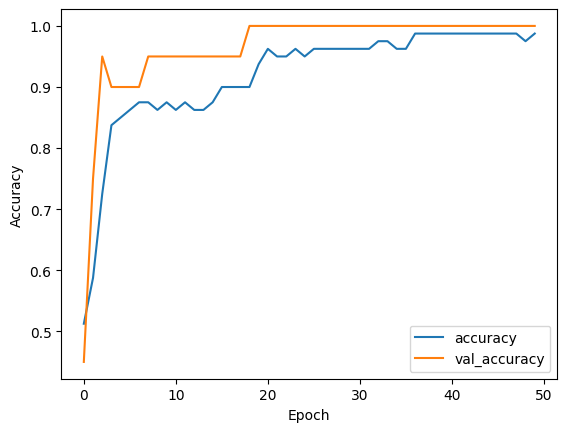

In [20]:
# Evaluate on test data
Y_pred = np . argmax ( model . predict ( X_test ) , axis =1)
Y_test_labels = np . argmax ( Y_test , axis =1)

# Performance analysis
print(classification_report(Y_test_labels, Y_pred)) #Prints a classification report.
print(confusion_matrix(Y_test_labels, Y_pred)) #Prints a confusion matrix.
print("Accuracy:", accuracy_score(Y_test_labels, Y_pred)) #Prints the accuracy score.

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy') #Plots the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='val_accuracy') #Plots the validation accuracy over epochs.
plt.xlabel('Epoch') #Sets the label for the x-axis to 'Epoch'.
plt.ylabel('Accuracy') #Sets the label for the y-axis to 'Accuracy'.
plt.legend(loc='lower right') #Adds a legend to the plot, positioned at the lower right.
plt.show() #Displays the plot.